In [ ]:
!pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 39.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/datasets/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 51 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1262 non-null   int64  
 1   fec_not            1262 non-null   object 
 2   semana             1262 non-null   int64  
 3   año                1262 non-null   int64  
 4   edad_              1262 non-null   int64  
 5   uni_med_           1262 non-null   int64  
 6   sexo_              1262 non-null   object 
 7   cod_pais_o         1262 non-null   int64  
 8   cod_dpto_o         1262 non-null   int64  
 9   cod_mun_o          1262 non-null   int64  
 10  area_              1262 non-null   int64  
 11  ocupacion_         1262 non-null   int64  
 12  tip_ss_            1262 non-null   object 
 13  cod_ase_           1253 non-null   object 
 14  gp_discapa         1262 non-null   int64  
 15  gp_desplaz         1262 non-null   int64  
 16  gp_migrant         1262 

In [ ]:
#Se formatean los datos de fecha
from datetime import datetime

df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")

In [ ]:
#Creación de la proyección
import pyproj

P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [ ]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT,710198.574916,780930.648555


In [ ]:
# res = area del cuadrado, bw = banda ancha(? no c, kernel = ni idea
res=10
bw=200
kernel=4 #epanechikov

In [ ]:
def kernel(distancia, bw):
  if distancia > bw:
    return 0
  u = distancia/bw
  return (3/4)*(1-u**2)

In [ ]:
xMin = df['x'].min() - bw
xMax = df['x'].max() + bw
yMin = df['y'].min() - bw
yMax = df['y'].max() + bw

In [ ]:
import math

numFilas = math.ceil((yMax - yMin) / res)
numCols = math.ceil((xMax - xMin) / res)

numFilas, numCols

(495, 478)

In [ ]:
# Generando Matriz con 0
matrix = np.zeros((numFilas, numCols))

In [ ]:
# Sumando el numero de casos que hay en cada cuadro
for x, y in zip(df['x'], df['y']):
  filaPunto = math.ceil((y - yMin) / res) - 1
  colsPunto = math.ceil((x - xMin) / res) - 1
  matrix[filaPunto, colsPunto] += 1

matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
def hallar_distancia(i1, j1, i2, j2):

  x1 = xMin + i1 * res
  y1 = (yMin + j1) * res
  x2 = xMin + i2 * res
  y2 = (yMin + j2) * res

  distancia = math.sqrt((x2-x1)**2+(y2-y1)**2)
  return distancia

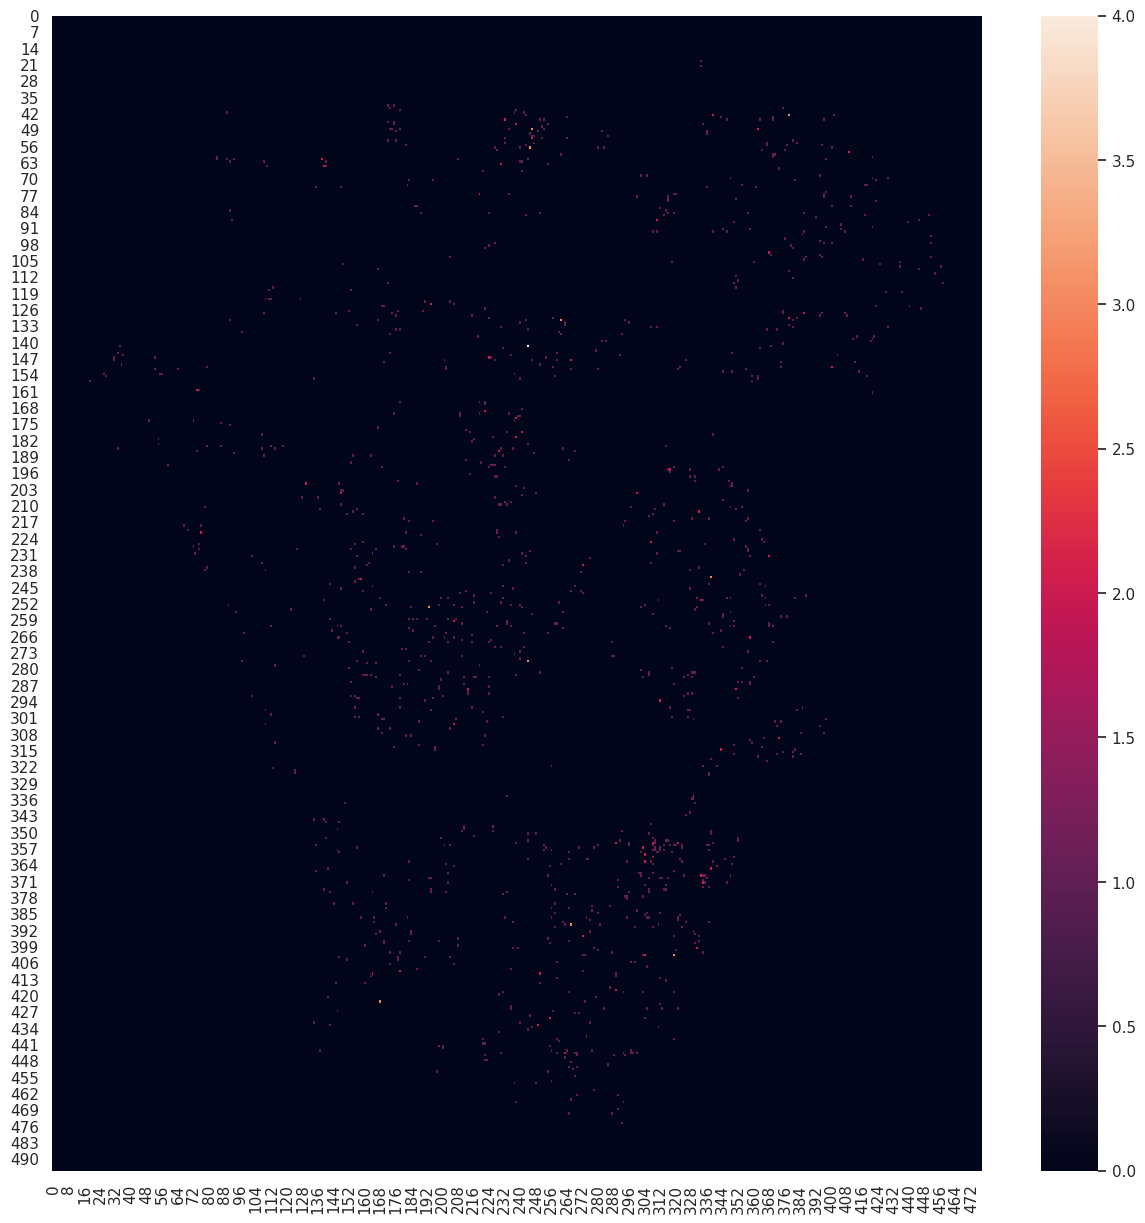

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,15)})
p = sns.heatmap(matrix)

In [ ]:
matrix_densidad = np.zeros((numFilas, numCols))

for columna in range(len(matrix[0])):
  for fila in range(len(matrix)):
    for x, y in zip(df['x'], df['y']):
      filaPunto = math.ceil((y - yMin) / res) - 1
      colsPunto = math.ceil((x - xMin) / res) - 1
      matrix_densidad[fila, columna] += kernel(hallar_distancia(fila, columna, filaPunto, colsPunto), bw)

In [ ]:
matrix_densidad

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

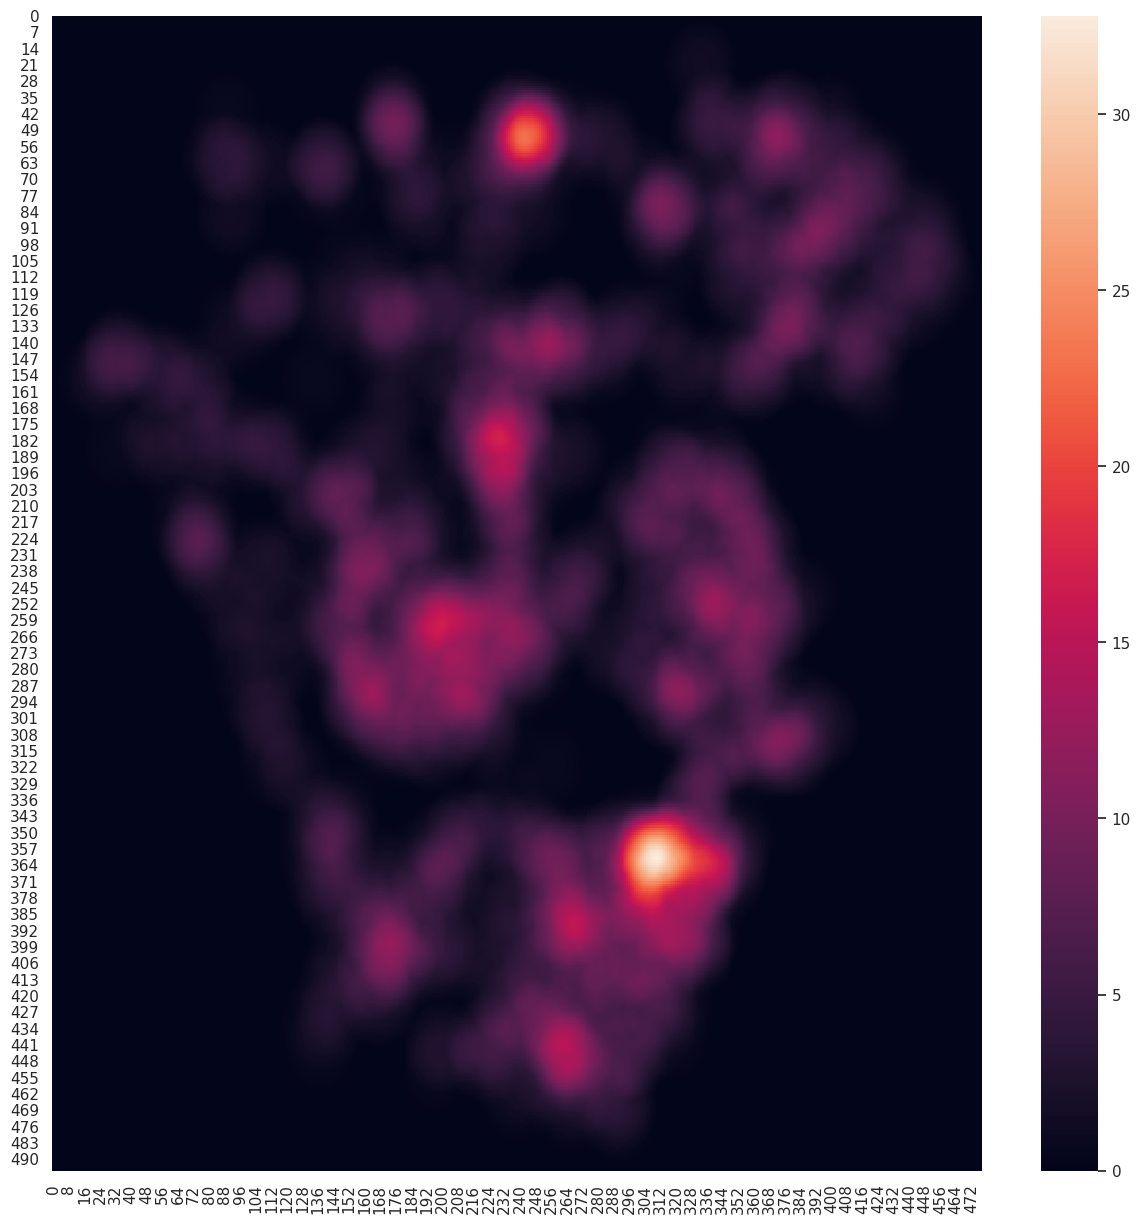

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
p = sns.heatmap(matrix_densidad)

# Prueba

In [ ]:
def hallar_distancia_dos(i1, j1, i2, j2):

  x1 = xMin + i1 * res
  y1 = (yMax - j1) * res
  x2 = xMin + i2 * res
  y2 = (yMax - j2) * res

  distancia = math.sqrt((x2-x1)**2+(y2-y1)**2)
  return distancia

In [ ]:
matrix_densidad = np.zeros((numFilas, numCols))
points = []
for i, row in df.iterrows():
  x, y = row['x'], row['y']
  points.append([x, y])


In [ ]:
for columna in range(len(matrix[0])):
  for fila in range(len(matrix)):
    for x, y in points:
      filaPunto = math.ceil((y - yMin) / res) - 1
      colsPunto = math.ceil((x - xMin) / res) - 1
      matrix_densidad[fila, columna] += kernel(hallar_distancia(fila, columna, filaPunto, colsPunto), bw)

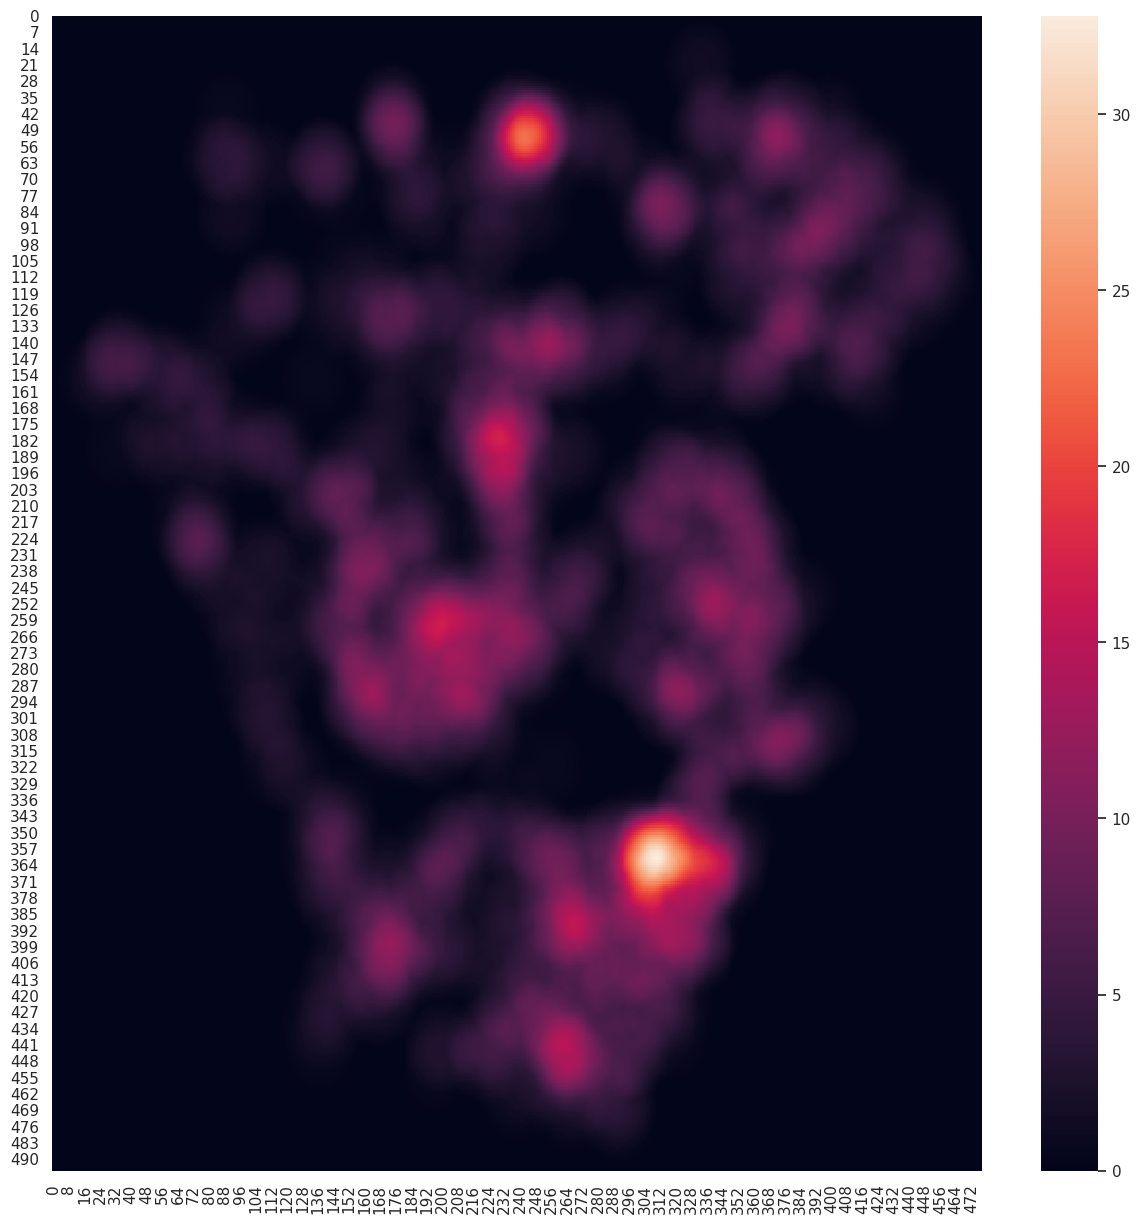

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
p = sns.heatmap(matrix_densidad)